### 1. Data Loading and Initial Exploration

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\data\parkinsons_class_data.csv")

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

    # Keep identifier and target
    'name': 'patient_id',
    'status': 'parkinsons_status',  # 0=Healthy, 1=Parkinson's
    
    # Voice pitch measures
    'MDVP:Fo(Hz)': 'average_pitch_hz',
    'MDVP:Fhi(Hz)': 'max_pitch_hz', 
    'MDVP:Flo(Hz)': 'min_pitch_hz',
    
    # Voice stability - Jitter (pitch tremor)
    'MDVP:Jitter(%)': 'pitch_tremor_percent',
    'MDVP:Jitter(Abs)': 'pitch_tremor_absolute',
    'MDVP:RAP': 'pitch_instability_rap',
    'MDVP:PPQ': 'pitch_instability_ppq',
    'Jitter:DDP': 'pitch_variation_ddp',
    
    # Voice stability - Shimmer (volume tremor)
    'MDVP:Shimmer': 'volume_tremor',
    'MDVP:Shimmer(dB)': 'volume_tremor_db',
    'Shimmer:APQ3': 'volume_instability_3pt',
    'Shimmer:APQ5': 'volume_instability_5pt',
    'MDVP:APQ': 'volume_instability_11pt',
    'Shimmer:DDA': 'volume_variation_avg',
    
    # Voice quality
    'NHR': 'voice_breathiness',      # Higher = more breathy/hoarse
    'HNR': 'voice_clarity',          # Higher = clearer voice
    
    # Voice pattern complexity
    'RPDE': 'voice_complexity',
    'DFA': 'voice_pattern_scaling',
    'spread1': 'voice_nonlinearity_1',
    'spread2': 'voice_nonlinearity_2', 
    'D2': 'voice_pattern_dimension',
    'PPE': 'pitch_entropy'

In [7]:
# Healthcare-friendly column renaming
healthcare_column_mapping = {
    # Keep identifier and target
    'name': 'patient_id',
    'status': 'parkinsons_status',  # 0=Healthy, 1=Parkinson's
    
    # Voice pitch measures
    'MDVP:Fo(Hz)': 'average_pitch_hz',
    'MDVP:Fhi(Hz)': 'max_pitch_hz', 
    'MDVP:Flo(Hz)': 'min_pitch_hz',
    
    # Voice stability - Jitter (pitch tremor)
    'MDVP:Jitter(%)': 'pitch_tremor_percent',
    'MDVP:Jitter(Abs)': 'pitch_tremor_absolute',
    'MDVP:RAP': 'pitch_instability_rap',
    'MDVP:PPQ': 'pitch_instability_ppq',
    'Jitter:DDP': 'pitch_variation_ddp',
    
    # Voice stability - Shimmer (volume tremor)
    'MDVP:Shimmer': 'volume_tremor',
    'MDVP:Shimmer(dB)': 'volume_tremor_db',
    'Shimmer:APQ3': 'volume_instability_3pt',
    'Shimmer:APQ5': 'volume_instability_5pt',
    'MDVP:APQ': 'volume_instability_11pt',
    'Shimmer:DDA': 'volume_variation_avg',
    
    # Voice quality
    'NHR': 'voice_breathiness',      # Higher = more breathy/hoarse
    'HNR': 'voice_clarity',          # Higher = clearer voice
    
    # Voice pattern complexity
    'RPDE': 'voice_complexity',
    'DFA': 'voice_pattern_scaling',
    'spread1': 'voice_nonlinearity_1',
    'spread2': 'voice_nonlinearity_2', 
    'D2': 'voice_pattern_dimension',
    'PPE': 'pitch_entropy'
}

# Apply renaming
df_renamed = df.rename(columns=healthcare_column_mapping)

In [8]:
df_renamed.head()

,patient_id,average_pitch_hz,max_pitch_hz,min_pitch_hz,pitch_tremor_percent,pitch_tremor_absolute,pitch_instability_rap,pitch_instability_ppq,pitch_variation_ddp,volume_tremor,...,volume_variation_avg,voice_breathiness,voice_clarity,parkinsons_status,voice_complexity,voice_pattern_scaling,voice_nonlinearity_1,voice_nonlinearity_2,voice_pattern_dimension,pitch_entropy
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
df_renamed.describe()

,average_pitch_hz,max_pitch_hz,min_pitch_hz,pitch_tremor_percent,pitch_tremor_absolute,pitch_instability_rap,pitch_instability_ppq,pitch_variation_ddp,volume_tremor,volume_tremor_db,...,volume_variation_avg,voice_breathiness,voice_clarity,parkinsons_status,voice_complexity,voice_pattern_scaling,voice_nonlinearity_1,voice_nonlinearity_2,voice_pattern_dimension,pitch_entropy
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               195 non-null    object 
 1   average_pitch_hz         195 non-null    float64
 2   max_pitch_hz             195 non-null    float64
 3   min_pitch_hz             195 non-null    float64
 4   pitch_tremor_percent     195 non-null    float64
 5   pitch_tremor_absolute    195 non-null    float64
 6   pitch_instability_rap    195 non-null    float64
 7   pitch_instability_ppq    195 non-null    float64
 8   pitch_variation_ddp      195 non-null    float64
 9   volume_tremor            195 non-null    float64
 10  volume_tremor_db         195 non-null    float64
 11  volume_instability_3pt   195 non-null    float64
 12  volume_instability_5pt   195 non-null    float64
 13  volume_instability_11pt  195 non-null    float64
 14  volume_variation_avg     1

In [12]:
df_renamed.isnull().sum()

patient_id                 0
average_pitch_hz           0
max_pitch_hz               0
min_pitch_hz               0
pitch_tremor_percent       0
pitch_tremor_absolute      0
pitch_instability_rap      0
pitch_instability_ppq      0
pitch_variation_ddp        0
volume_tremor              0
volume_tremor_db           0
volume_instability_3pt     0
volume_instability_5pt     0
volume_instability_11pt    0
volume_variation_avg       0
voice_breathiness          0
voice_clarity              0
parkinsons_status          0
voice_complexity           0
voice_pattern_scaling      0
voice_nonlinearity_1       0
voice_nonlinearity_2       0
voice_pattern_dimension    0
pitch_entropy              0
dtype: int64

In [17]:
df_renamed.describe()

,average_pitch_hz,max_pitch_hz,min_pitch_hz,pitch_tremor_percent,pitch_tremor_absolute,pitch_instability_rap,pitch_instability_ppq,pitch_variation_ddp,volume_tremor,volume_tremor_db,...,volume_variation_avg,voice_breathiness,voice_clarity,parkinsons_status,voice_complexity,voice_pattern_scaling,voice_nonlinearity_1,voice_nonlinearity_2,voice_pattern_dimension,pitch_entropy
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
df_renamed.duplicated().sum()  # Check for duplicate rows

0

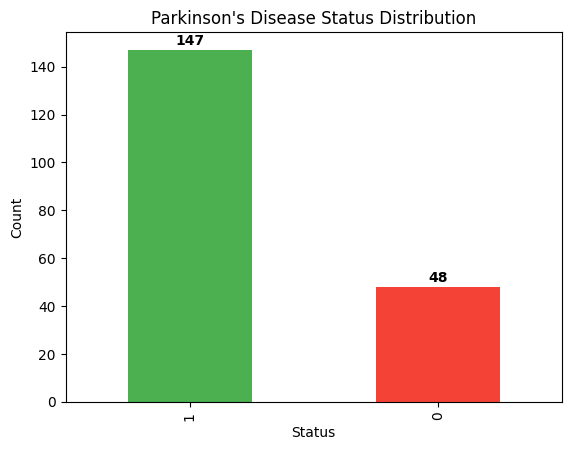

In [15]:
df_renamed['parkinsons_status'].value_counts().plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Parkinson\'s Disease Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
for i, v in enumerate(df_renamed['parkinsons_status'].value_counts()):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')
plt.show()

### we will use smote and scaling to address the data imbalance and scaling issues

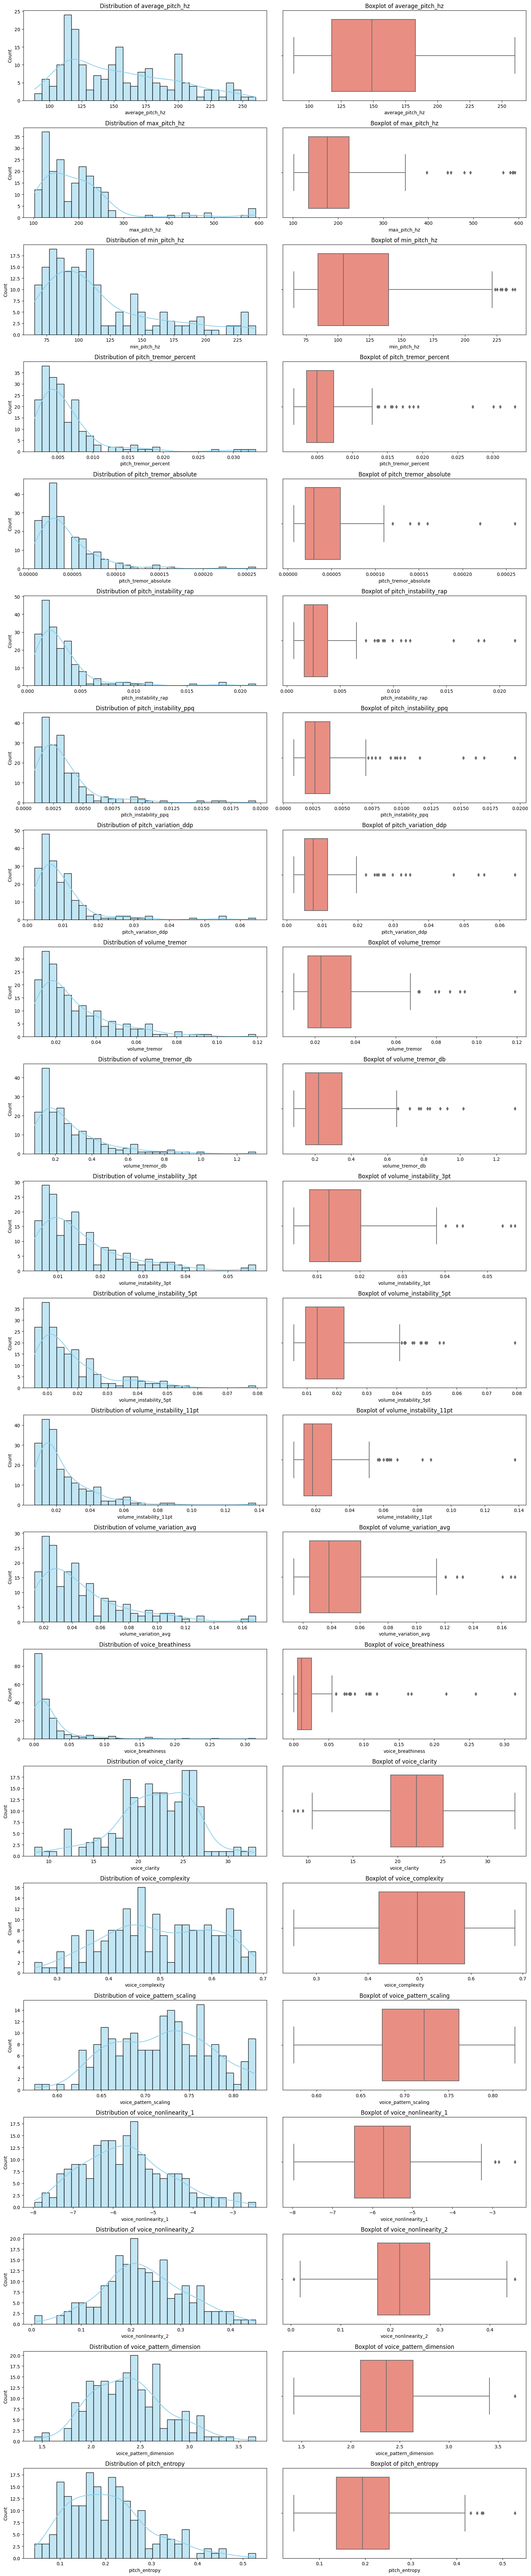

In [20]:
# Select only numerical columns, excluding the target
numerical_cols = df_renamed.select_dtypes(include=['int64', 'float64']).drop(['parkinsons_status'], axis=1).columns

# Set up the plot grid
plt.figure(figsize=(16, len(numerical_cols) * 3.5))  # adjust height for better spacing

for i, col in enumerate(numerical_cols, 1):
    # Histogram
    plt.subplot(len(numerical_cols), 2, 2*i - 1)
    sns.histplot(df_renamed[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.boxplot(x=df_renamed[col], color='salmon', orient='h')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### ⚠️ Outlier Justification in Vocal Biomarkers

While several vocal features such as jitter, shimmer, breathiness, and nonlinearity metrics exhibit visible outliers, we choose **not to remove them** at this stage.

> **Reason:**  
Outliers in biomedical voice data are often a reflection of real patient variability especially in clinical conditions like Parkinson’s disease, where vocal impairments can vary drastically between individuals. What may appear as statistical outliers could in fact represent **true pathological deviations** that are clinically significant.

Therefore:
- We retain these values to preserve clinical signal
- We rely on robust modeling techniques (e.g., tree-based models, scaling) to handle this variation appropriately
- Any filtering of extreme values, if needed, will be justified based on model diagnostics  not just statistical heuristics

This approach ensures we don't unintentionally exclude data points that may be **critical for early diagnosis or severe symptom recognition**.


C:\Users\pascal\AppData\Local\Temp\ipykernel_20560\865093316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_matrix = df_renamed.corr()


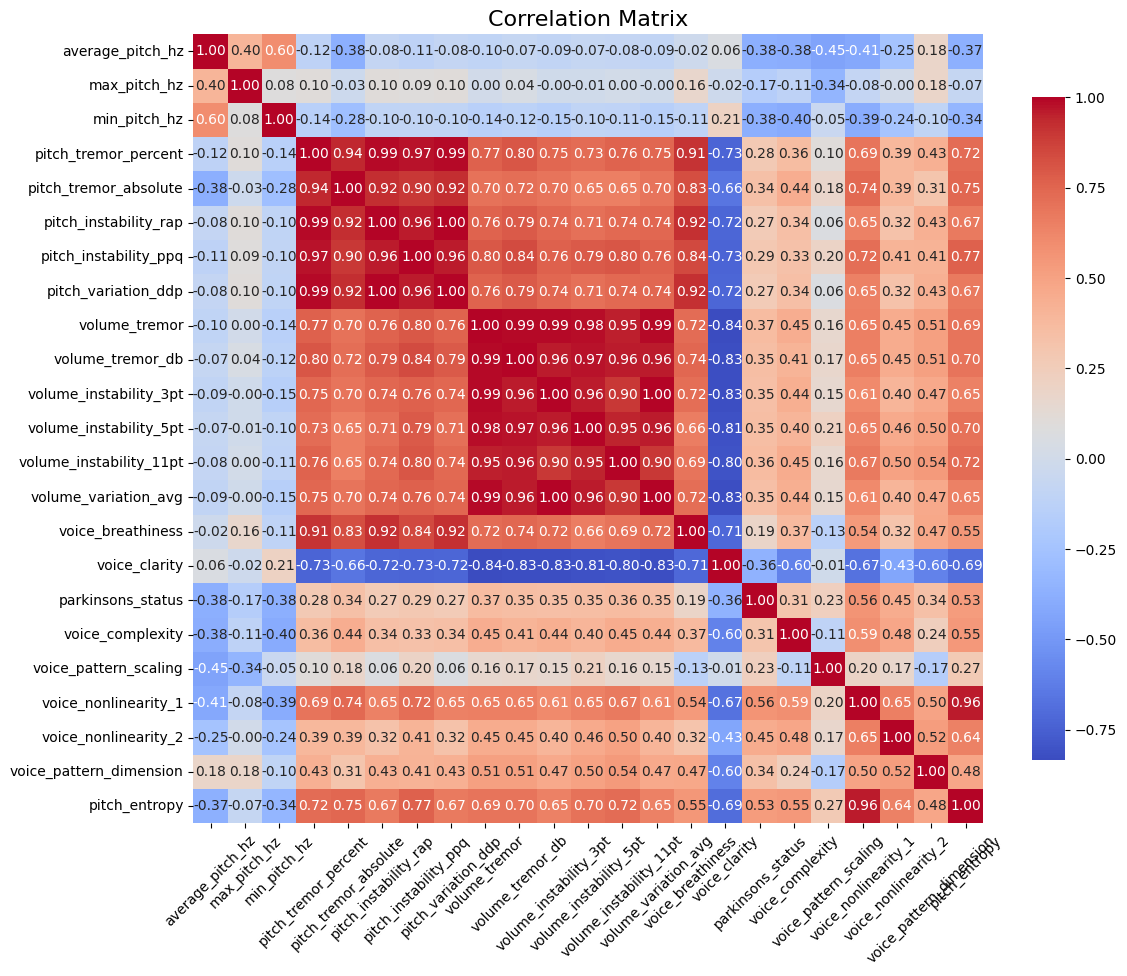

In [21]:


# Compute correlation matrix
correl_matrix = df_renamed.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correl_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
correl_matrix 

,average_pitch_hz,max_pitch_hz,min_pitch_hz,pitch_tremor_percent,pitch_tremor_absolute,pitch_instability_rap,pitch_instability_ppq,pitch_variation_ddp,volume_tremor,volume_tremor_db,...,volume_variation_avg,voice_breathiness,voice_clarity,parkinsons_status,voice_complexity,voice_pattern_scaling,voice_nonlinearity_1,voice_nonlinearity_2,voice_pattern_dimension,pitch_entropy
average_pitch_hz,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
max_pitch_hz,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
min_pitch_hz,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
pitch_tremor_percent,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
pitch_tremor_absolute,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
pitch_instability_rap,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
pitch_instability_ppq,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
pitch_variation_ddp,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
volume_tremor,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
volume_tremor_db,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [28]:
correlation_with_target = correl_matrix['parkinsons_status'].drop('parkinsons_status')

correlation_with_target_df = correlation_with_target.to_frame().reset_index()
correlation_with_target_df.columns = ['Feature', 'Correlation parkinsons_status']

print("\n📈 CORRELATIONS WITH TARGET (after multicollinearity check( there wasnt)):")
print(correlation_with_target_df)


📈 CORRELATIONS WITH TARGET (after multicollinearity check( there wasnt)):
                    Feature  Correlation parkinsons_status
0          average_pitch_hz                      -0.383535
1              max_pitch_hz                      -0.166136
2              min_pitch_hz                      -0.380200
3      pitch_tremor_percent                       0.278220
4     pitch_tremor_absolute                       0.338653
5     pitch_instability_rap                       0.266668
6     pitch_instability_ppq                       0.288698
7       pitch_variation_ddp                       0.266646
8             volume_tremor                       0.367430
9          volume_tremor_db                       0.350697
10   volume_instability_3pt                       0.347617
11   volume_instability_5pt                       0.351148
12  volume_instability_11pt                       0.364316
13     volume_variation_avg                       0.347608
14        voice_breathiness             

In [31]:
correlation_threshold = 0.06 # define the correlation threshold below which features will be dropped

strong_correlations = correlation_with_target[abs(correlation_with_target) >= correlation_threshold]

features_to_keep = strong_correlations.index.tolist()

df_final = df_renamed[features_to_keep + ['parkinsons_status']]

print(f"\n✅ FINAL FEATURE SET:")
print(f"Features: {df_final.columns.tolist()}")
print(f"Shape: {df_final.shape}")

df_final.head()


✅ FINAL FEATURE SET:
Features: ['average_pitch_hz', 'max_pitch_hz', 'min_pitch_hz', 'pitch_tremor_percent', 'pitch_tremor_absolute', 'pitch_instability_rap', 'pitch_instability_ppq', 'pitch_variation_ddp', 'volume_tremor', 'volume_tremor_db', 'volume_instability_3pt', 'volume_instability_5pt', 'volume_instability_11pt', 'volume_variation_avg', 'voice_breathiness', 'voice_clarity', 'voice_complexity', 'voice_pattern_scaling', 'voice_nonlinearity_1', 'voice_nonlinearity_2', 'voice_pattern_dimension', 'pitch_entropy', 'parkinsons_status']
Shape: (195, 23)


,average_pitch_hz,max_pitch_hz,min_pitch_hz,pitch_tremor_percent,pitch_tremor_absolute,pitch_instability_rap,pitch_instability_ppq,pitch_variation_ddp,volume_tremor,volume_tremor_db,...,volume_variation_avg,voice_breathiness,voice_clarity,voice_complexity,voice_pattern_scaling,voice_nonlinearity_1,voice_nonlinearity_2,voice_pattern_dimension,pitch_entropy,parkinsons_status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [32]:
df_final.columns

Index(['average_pitch_hz', 'max_pitch_hz', 'min_pitch_hz',
       'pitch_tremor_percent', 'pitch_tremor_absolute',
       'pitch_instability_rap', 'pitch_instability_ppq', 'pitch_variation_ddp',
       'volume_tremor', 'volume_tremor_db', 'volume_instability_3pt',
       'volume_instability_5pt', 'volume_instability_11pt',
       'volume_variation_avg', 'voice_breathiness', 'voice_clarity',
       'voice_complexity', 'voice_pattern_scaling', 'voice_nonlinearity_1',
       'voice_nonlinearity_2', 'voice_pattern_dimension', 'pitch_entropy',
       'parkinsons_status'],
      dtype='object')

## Model Training and Evaluation

Training multiple machine learning algorithms with SMOTE balancing and comprehensive evaluation.

In [34]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


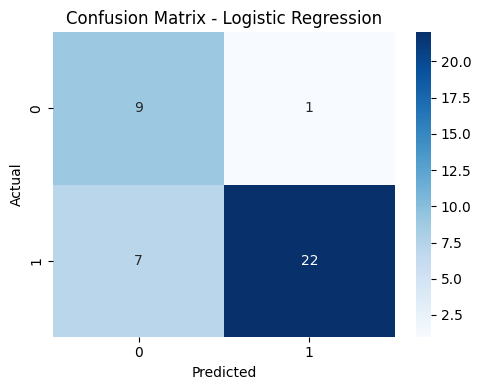

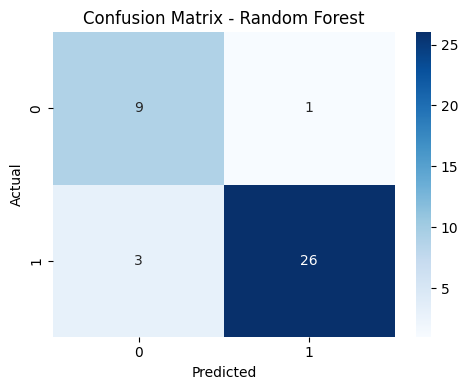

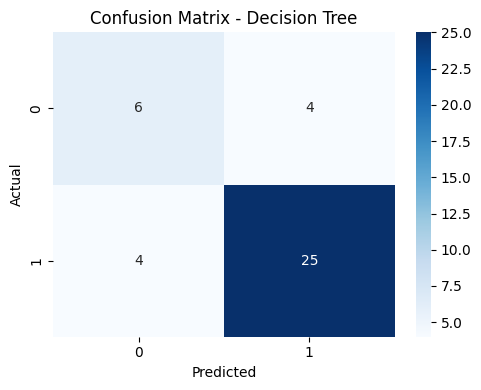

c:\Users\pascal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:06:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


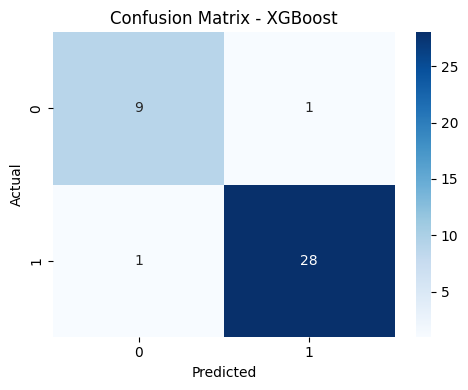

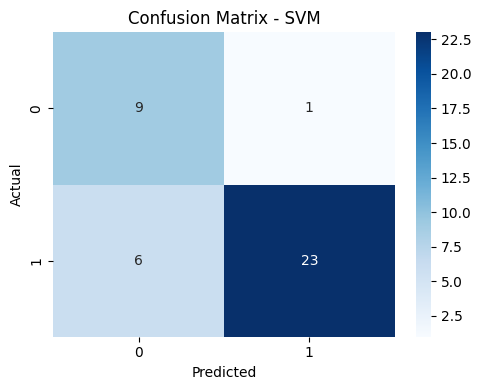

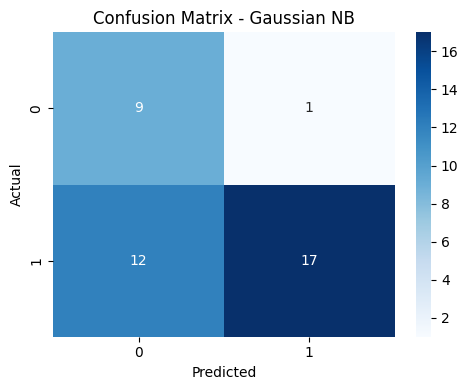

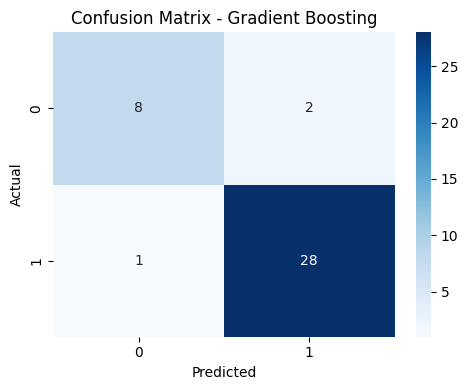


Model Performance Comparison:

                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
3              XGBoost    0.9487     0.9655  0.9655    0.9655   0.9759
6    Gradient Boosting    0.9231     0.9333  0.9655    0.9492   0.9862
1        Random Forest    0.8974     0.9630  0.8966    0.9286   0.9845
4                  SVM    0.8205     0.9583  0.7931    0.8679   0.9345
0  Logistic Regression    0.7949     0.9565  0.7586    0.8462   0.9241
2        Decision Tree    0.7949     0.8621  0.8621    0.8621   0.7310
5          Gaussian NB    0.6667     0.9444  0.5862    0.7234   0.8552


In [37]:

# ========== Split data ==========
X = df_final.drop('parkinsons_status', axis=1)
y = df_final['parkinsons_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ========== Preprocessing ==========
scaler = ColumnTransformer(
    transformers=[('num', StandardScaler(), X.columns)],
    remainder='passthrough'
)

# ========== Classifiers ==========
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('Gaussian NB', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# ========== Results container ==========
results = {
    'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [],
    'F1 Score': [], 'ROC AUC': []
}

trained_models = []

# ========== Loop and evaluate ==========
for name, clf in models:
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', scaler),
        ('clf', clf)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None

    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred), 4))
    results['F1 Score'].append(round(f1_score(y_test, y_pred), 4))
    results['ROC AUC'].append(round(roc_auc_score(y_test, y_proba), 4) if y_proba is not None else 'N/A')


    trained_models.append((name, pipe))  # Save trained model with its name

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# ========== Show results ==========
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df.sort_values(by='Accuracy', ascending=False))


## Modedl export and testing

In [38]:
import os, pickle, joblib, warnings
#  suppress harmless warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [39]:
# Get the best model name
best_index = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_index, 'Model']
print(f"\n✅ Best Model (based on Accuracy): {best_model_name}")
print(results_df.loc[best_index])  # See all metrics


✅ Best Model (based on Accuracy): XGBoost
Model        XGBoost
Accuracy      0.9487
Precision     0.9655
Recall        0.9655
F1 Score      0.9655
ROC AUC       0.9759
Name: 3, dtype: object


In [40]:
# Retrieve the trained pipeline
best_pipeline = next(pipe for name, pipe in trained_models if name == best_model_name)

# Save it
model_name_safe = best_model_name.replace(" ", "_").lower()
save_path = r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models"
os.makedirs(save_path, exist_ok=True)

In [41]:

# Joblib
joblib_path = os.path.join(save_path, f"{model_name_safe}_model_parkinstons.joblib")
joblib.dump(best_pipeline, joblib_path)

# Pickle
pickle_path = os.path.join(save_path, f"{model_name_safe}_model_parkinstons.pkl")
with open(pickle_path, 'wb') as f:
    pickle.dump(best_pipeline, f)

print(f"\n✅ Saved best model as:\n→ Joblib: {joblib_path}\n→ Pickle: {pickle_path}")


✅ Saved best model as:
→ Joblib: C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models\xgboost_model_parkinstons.joblib
→ Pickle: C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models\xgboost_model_parkinstons.pkl


### testing

In [42]:
model_path = r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models\xgboost_model_parkinstons.joblib"
model = joblib.load(model_path)

### Random test patients ( healthy and parkinsons)

In [63]:
test_patient = pd.DataFrame([
    {
        # Patient 1: HIGH RISK 
        'average_pitch_hz': 105,
        'max_pitch_hz': 135,
        'min_pitch_hz': 78,
        'pitch_tremor_percent': 0.018,
        'pitch_tremor_absolute': 0.00008,
        'pitch_instability_rap': 0.012,
        'pitch_instability_ppq': 0.013,
        'pitch_variation_ddp': 0.036,
        'volume_tremor': 0.055,
        'volume_tremor_db': 0.48,
        'volume_instability_3pt': 0.052,
        'volume_instability_5pt': 0.054,
        'volume_instability_11pt': 0.058,
        'volume_variation_avg': 0.078,
        'voice_breathiness': 0.085,
        'voice_clarity': 12.5,
        'voice_complexity': 0.62,
        'voice_pattern_scaling': 0.81,
        'voice_nonlinearity_1': -3.2,
        'voice_nonlinearity_2': 0.38,
        'voice_pattern_dimension': 3.1,
        'pitch_entropy': 0.41
    },
    {
        # Patient 2: LOW RISK 
        'average_pitch_hz': 185,
        'max_pitch_hz': 245,
        'min_pitch_hz': 142,
        'pitch_tremor_percent': 0.0035,
        'pitch_tremor_absolute': 0.000018,
        'pitch_instability_rap': 0.0021,
        'pitch_instability_ppq': 0.0024,
        'pitch_variation_ddp': 0.0063,
        'volume_tremor': 0.018,
        'volume_tremor_db': 0.16,
        'volume_instability_3pt': 0.015,
        'volume_instability_5pt': 0.017,
        'volume_instability_11pt': 0.019,
        'volume_variation_avg': 0.025,
        'voice_breathiness': 0.012,
        'voice_clarity': 28.5,
        'voice_complexity': 0.38,
        'voice_pattern_scaling': 0.68,
        'voice_nonlinearity_1': -6.8,
        'voice_nonlinearity_2': 0.15,
        'voice_pattern_dimension': 1.9,
        'pitch_entropy': 0.12
    },
    {
        # Patient 3: TRUE MODERATE RISK (closer to training data means)
        'average_pitch_hz': 160,           # Closer to mean (154)
        'max_pitch_hz': 190,               # Closer to mean (197)
        'min_pitch_hz': 115,               # Closer to mean (116)
        'pitch_tremor_percent': 0.0065,    # Closer to mean (0.0062)
        'pitch_tremor_absolute': 0.000042, # Closer to mean (0.000044)
        'pitch_instability_rap': 0.0034,   # Closer to mean (0.0033)
        'pitch_instability_ppq': 0.0036,   # Closer to mean (0.0034)
        'pitch_variation_ddp': 0.010,      # Closer to mean (0.0099)
        'volume_tremor': 0.031,            # Closer to mean (0.0297)
        'volume_tremor_db': 0.29,          # Closer to mean (0.282)
        'volume_instability_3pt': 0.026,   # Conservative values
        'volume_instability_5pt': 0.028,
        'volume_instability_11pt': 0.032,
        'volume_variation_avg': 0.038,
        'voice_breathiness': 0.026,        # Closer to mean (0.0248)
        'voice_clarity': 20.5,             # Closer to mean (21.9)
        'voice_complexity': 0.52,          # Closer to mean (0.498)
        'voice_pattern_scaling': 0.72,     # Closer to mean (0.718)
        'voice_nonlinearity_1': -5.1,      # Closer to mean (-5.68)
        'voice_nonlinearity_2': 0.21,      # Closer to mean (0.227)
        'voice_pattern_dimension': 2.25,   # Closer to mean (2.38)
        'pitch_entropy': 0.19              # Closer to mean (0.207)
    },
    {
        # Patient 4: TRUE BORDERLINE (values right at decision boundary)
        'average_pitch_hz': 170,           # Normal range
        'max_pitch_hz': 210,               # Normal range
        'min_pitch_hz': 130,               # Normal range
        'pitch_tremor_percent': 0.0048,    # Slightly below mean
        'pitch_tremor_absolute': 0.000035, # Around mean
        'pitch_instability_rap': 0.0028,   # Around mean
        'pitch_instability_ppq': 0.0030,   # Around mean
        'pitch_variation_ddp': 0.0085,     # Around mean
        'volume_tremor': 0.026,            # Around mean
        'volume_tremor_db': 0.25,          # Around mean
        'volume_instability_3pt': 0.022,
        'volume_instability_5pt': 0.024,
        'volume_instability_11pt': 0.027,
        'volume_variation_avg': 0.032,
        'voice_breathiness': 0.020,        # Around mean
        'voice_clarity': 23.5,             # Above mean (good)
        'voice_complexity': 0.46,          # Around mean
        'voice_pattern_scaling': 0.71,     # Around mean
        'voice_nonlinearity_1': -6.0,      # Around mean
        'voice_nonlinearity_2': 0.20,      # Around mean
        'voice_pattern_dimension': 2.2,    # Around mean
        'pitch_entropy': 0.18              # Around mean
    }
])



In [58]:
def predict_parkinsons_batch(model, patients_df):
    probabilities = model.predict_proba(patients_df)[:, 1]
    predictions = model.predict(patients_df)
    
    for i, (pred, proba) in enumerate(zip(predictions, probabilities)):
        result = 'Parkinson\'s Disease Risk Detected' if pred == 1 else 'No Parkinson\'s Risk Detected'
        
        # Clear medical interpretation
        if proba >= 0.8:
            risk_level = "🔴 HIGH RISK"
            action = "Recommend immediate neurological evaluation"
        elif proba >= 0.6:
            risk_level = "🟠 MODERATE-HIGH RISK"
            action = "Recommend neurological consultation"
        elif proba >= 0.4:
            risk_level = "🟡 MODERATE RISK"
            action = "Consider follow-up assessment"
        elif proba >= 0.2:
            risk_level = "🟢 LOW-MODERATE RISK"
            action = "Routine monitoring recommended"
        else:
            risk_level = "✅ LOW RISK"
            action = "No immediate action needed"
        
        print(f"\nPatient {i+1}:")
        print(f"🔍 Prediction: {result}")
        print(f"🧪 Probability: {round(proba, 4)} ({round(proba*100, 1)}%)")
        print(f"📊 Risk Level: {risk_level}")
        print(f"💊 Clinical Action: {action}")
    
    return predictions, probabilities

In [64]:
predictions, probabilities = predict_parkinsons_batch(model, test_patient)



Patient 1:
🔍 Prediction: Parkinson's Disease Risk Detected
🧪 Probability: 0.9991000294685364 (99.9%)
📊 Risk Level: 🔴 HIGH RISK
💊 Clinical Action: Recommend immediate neurological evaluation

Patient 2:
🔍 Prediction: No Parkinson's Risk Detected
🧪 Probability: 0.02969999983906746 (3.0%)
📊 Risk Level: ✅ LOW RISK
💊 Clinical Action: No immediate action needed

Patient 3:
🔍 Prediction: Parkinson's Disease Risk Detected
🧪 Probability: 0.9997000098228455 (100.0%)
📊 Risk Level: 🔴 HIGH RISK
💊 Clinical Action: Recommend immediate neurological evaluation

Patient 4:
🔍 Prediction: Parkinson's Disease Risk Detected
🧪 Probability: 0.9811999797821045 (98.1%)
📊 Risk Level: 🔴 HIGH RISK
💊 Clinical Action: Recommend immediate neurological evaluation


### Random healthy test patients

In [65]:
# Create extremely healthy patient (best possible values)
extremely_healthy = pd.DataFrame([{
    'average_pitch_hz': 200,     # High pitch (good)
    'max_pitch_hz': 280,         # Great range  
    'min_pitch_hz': 150,         # High minimum
    'pitch_tremor_percent': 0.001,    # Minimal jitter
    'pitch_tremor_absolute': 0.000005, # Minimal absolute jitter
    'pitch_instability_rap': 0.0005,   # Minimal instability
    'pitch_instability_ppq': 0.0006,   # Minimal perturbation
    'pitch_variation_ddp': 0.002,      # Minimal variation
    'volume_tremor': 0.008,            # Minimal shimmer
    'volume_tremor_db': 0.08,          # Minimal dB variation
    'volume_instability_3pt': 0.006,   # Minimal instability
    'volume_instability_5pt': 0.007,   # Minimal instability
    'volume_instability_11pt': 0.008,  # Minimal instability
    'volume_variation_avg': 0.012,     # Minimal variation
    'voice_breathiness': 0.003,        # Minimal breathiness
    'voice_clarity': 35.0,             # Excellent clarity
    'voice_complexity': 0.25,          # Low complexity
    'voice_pattern_scaling': 0.60,     # Low scaling
    'voice_nonlinearity_1': -8.0,      # Low nonlinearity
    'voice_nonlinearity_2': 0.08,      # Low nonlinearity
    'voice_pattern_dimension': 1.5,    # Low dimension
    'pitch_entropy': 0.05              # Low entropy
}])

print("Testing EXTREMELY healthy patient:")
predictions, probabilities = predict_parkinsons_batch(model, extremely_healthy)

Testing EXTREMELY healthy patient:

Patient 1:
🔍 Prediction: No Parkinson's Risk Detected
🧪 Probability: 0.003100000089034438 (0.3%)
📊 Risk Level: ✅ LOW RISK
💊 Clinical Action: No immediate action needed


### Test with some actual healthy patients from training data

In [ ]:
# Test with some actual healthy patients from training data
healthy_samples = df_final[df_final['parkinsons_status'] == 0].drop('parkinsons_status', axis=1).head(3)
parkinson_samples = df_final[df_final['parkinsons_status'] == 1].drop('parkinsons_status', axis=1).head(3)

print("Testing with actual HEALTHY patients from training data:")
predictions, probabilities = predict_parkinsons_batch(model, healthy_samples)

print("\nTesting with actual PARKINSON'S patients from training data:")
predictions, probabilities = predict_parkinsons_batch(model, parkinson_samples)

Testing with actual HEALTHY patients from training data:

Patient 1:
🔍 Prediction: No Parkinson's Risk Detected
🧪 Probability: 0.004800000227987766 (0.5%)
📊 Risk Level: ✅ LOW RISK
💊 Clinical Action: No immediate action needed

Patient 2:
🔍 Prediction: No Parkinson's Risk Detected
🧪 Probability: 0.0034000000450760126 (0.3%)
📊 Risk Level: ✅ LOW RISK
💊 Clinical Action: No immediate action needed

Patient 3:
🔍 Prediction: No Parkinson's Risk Detected
🧪 Probability: 0.0024999999441206455 (0.2%)
📊 Risk Level: ✅ LOW RISK
💊 Clinical Action: No immediate action needed

Testing with actual PARKINSON'S patients from training data:

Patient 1:
🔍 Prediction: Parkinson's Disease Risk Detected
🧪 Probability: 0.9976999759674072 (99.8%)
📊 Risk Level: 🔴 HIGH RISK
💊 Clinical Action: Recommend immediate neurological evaluation

Patient 2:
🔍 Prediction: Parkinson's Disease Risk Detected
🧪 Probability: 0.9991999864578247 (99.9%)
📊 Risk Level: 🔴 HIGH RISK
💊 Clinical Action: Recommend immediate neurological e